In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

DATA EXPLORATORY

In [2]:
#import all data
calendarData = pd.read_csv('seattle/calendar.csv')
listingsData = pd.read_csv('seattle/listings.csv')
reviewsData = pd.read_csv('seattle/reviews.csv')
calendarData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [4]:
calendarData['price'] = calendarData['price'].str.replace("[$, ]", "").astype("float")
listingsData['price'] = listingsData['price'].str.replace("[$, ]", "").astype("float")

AttributeError: Can only use .str accessor with string values!

In [5]:
#corr of date to price and 
calendarData['date'] = pd.to_datetime(calendarData["date"])
calendarData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null datetime64[ns]
available     1393570 non-null object
price         934542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 42.5+ MB


In [7]:
calendarData['month'] = pd.to_datetime(calendarData['date'], format='%m').dt.month_name().str.slice(stop=3)
calendarData

,listing_id,date,available,price,month
0,241032,2016-01-04,t,85.0,Jan
1,241032,2016-01-05,t,85.0,Jan
2,241032,2016-01-06,f,NaN,Jan
3,241032,2016-01-07,f,NaN,Jan
4,241032,2016-01-08,f,NaN,Jan
...,...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN,Dec
1393566,10208623,2016-12-30,f,NaN,Dec
1393567,10208623,2016-12-31,f,NaN,Dec
1393568,10208623,2017-01-01,f,NaN,Jan


Mean Price:  137.94485855103355
Median Price:  109.0


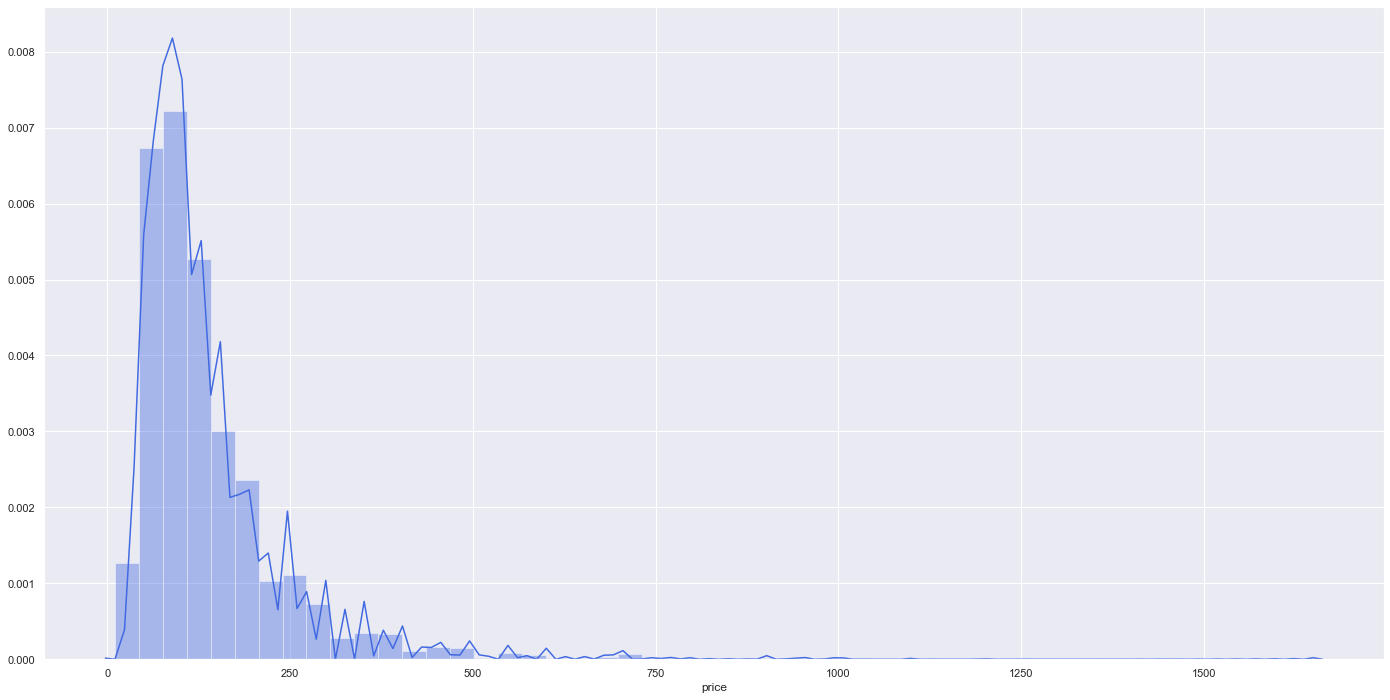

In [8]:
#Distribution of listing prices
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.distplot(calendarData['price'].dropna(), color = "royalblue")
print('Mean Price: ',calendarData['price'].mean())
print('Median Price: ',calendarData['price'].median())

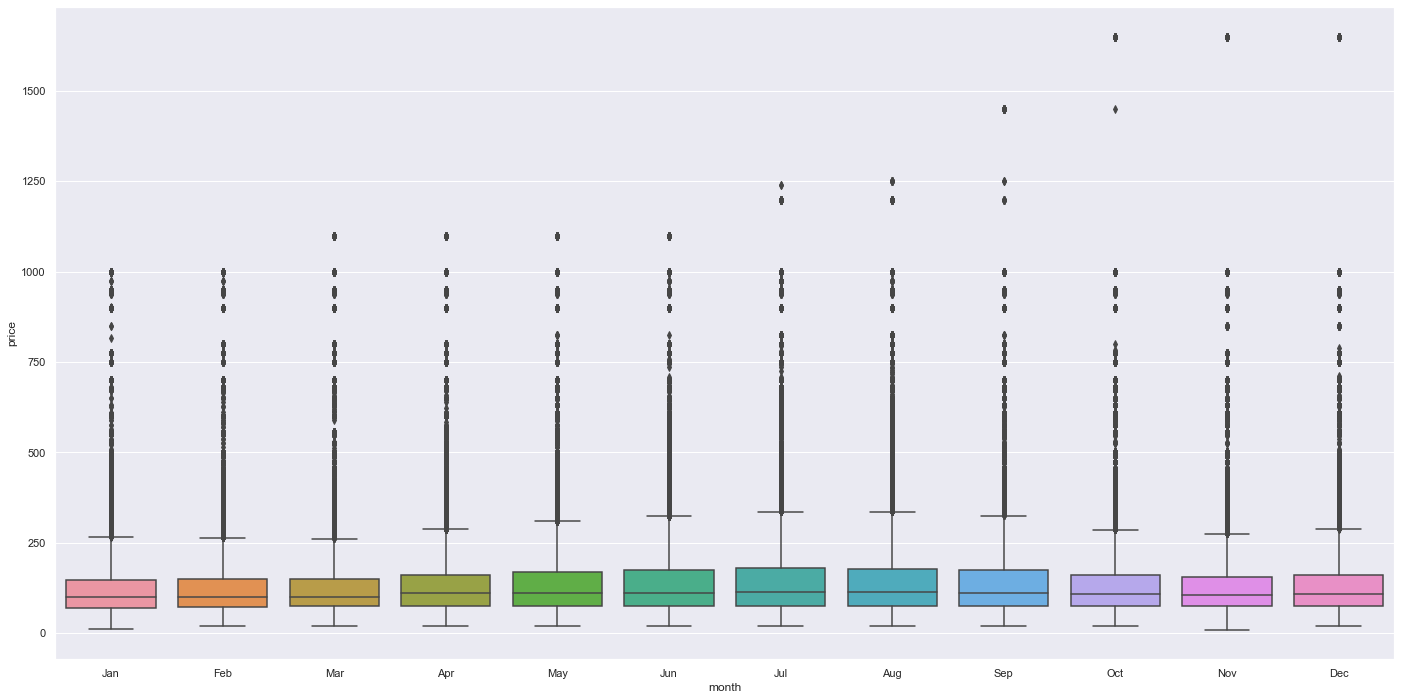

In [9]:
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.boxplot(x = 'month', y = 'price', data = calendarData)

#can use LOF to detect abnormality of prices on certain dates?

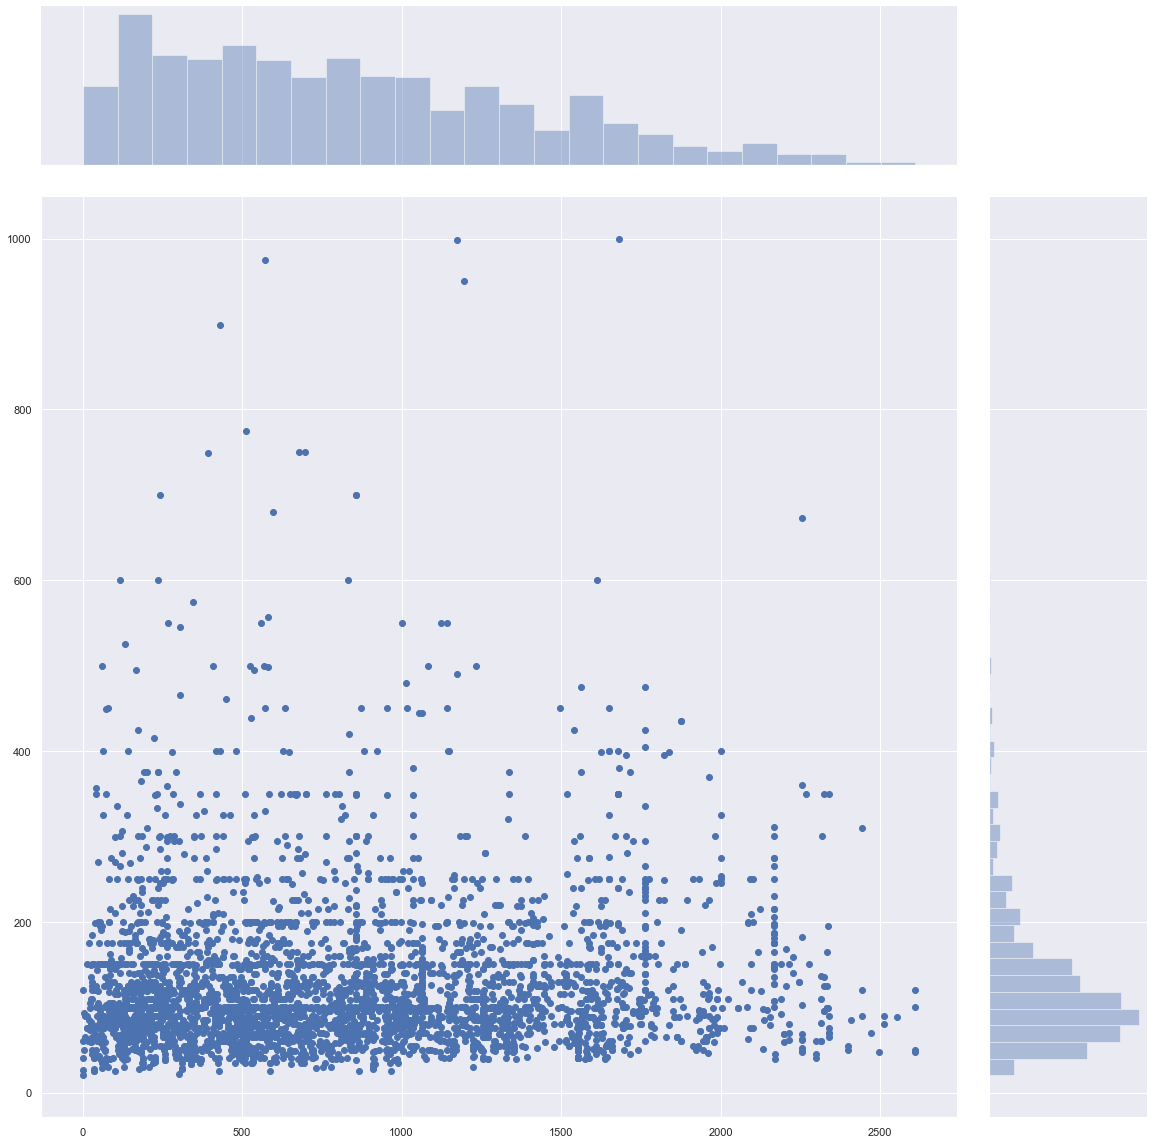

In [10]:
#1)host since(date) to price data
#Drop all columns not being explored.
listingsData = listingsData[['id','summary','space','description','neighbourhood','neighborhood_overview','notes','transit',
                            'host_since','host_location','host_about','host_response_time','host_response_rate',
                           'host_acceptance_rate','host_is_superhost','price','review_scores_rating','host_listings_count']]
listingsData
#prepare listings data.
listingsData['host_since'] = pd.to_datetime(listingsData["host_since"])
#add daysOnAirbnb column calculated from host_since
listingsData['days_on_airbnb'] = (np.datetime64('2016-01-04') - listingsData['host_since']).dt.days 
#calculate in number of days(linear regression?) whether 
#theres a correlation with number of days on airbnb to price
daysOnAirbnb = pd.DataFrame(listingsData['days_on_airbnb'])
listingPrice = pd.DataFrame(listingsData['price'])
sb.jointplot(x = daysOnAirbnb, y = listingPrice, height = 16)

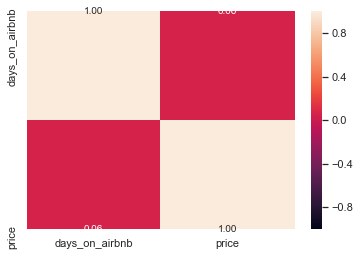

In [11]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([daysOnAirbnb, listingPrice.reindex(index=daysOnAirbnb.index)], sort = False, axis = 1)

# Calculate the correlation between the two columns/variables
jointDF.corr()
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

#commment: looks like theres almost no correlation between the number of days the host 
#has been on airbnb and price set. 0.03

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 19 columns):
id                       3818 non-null int64
summary                  3641 non-null object
space                    3249 non-null object
description              3818 non-null object
neighbourhood            3402 non-null object
neighborhood_overview    2786 non-null object
notes                    2212 non-null object
transit                  2884 non-null object
host_since               3816 non-null datetime64[ns]
host_location            3810 non-null object
host_about               2959 non-null object
host_response_time       3295 non-null object
host_response_rate       3295 non-null object
host_acceptance_rate     3045 non-null object
host_is_superhost        3816 non-null object
price                    3818 non-null float64
review_scores_rating     3171 non-null float64
host_listings_count      3816 non-null float64
days_on_airbnb           3816 non-null float64
dtypes: 

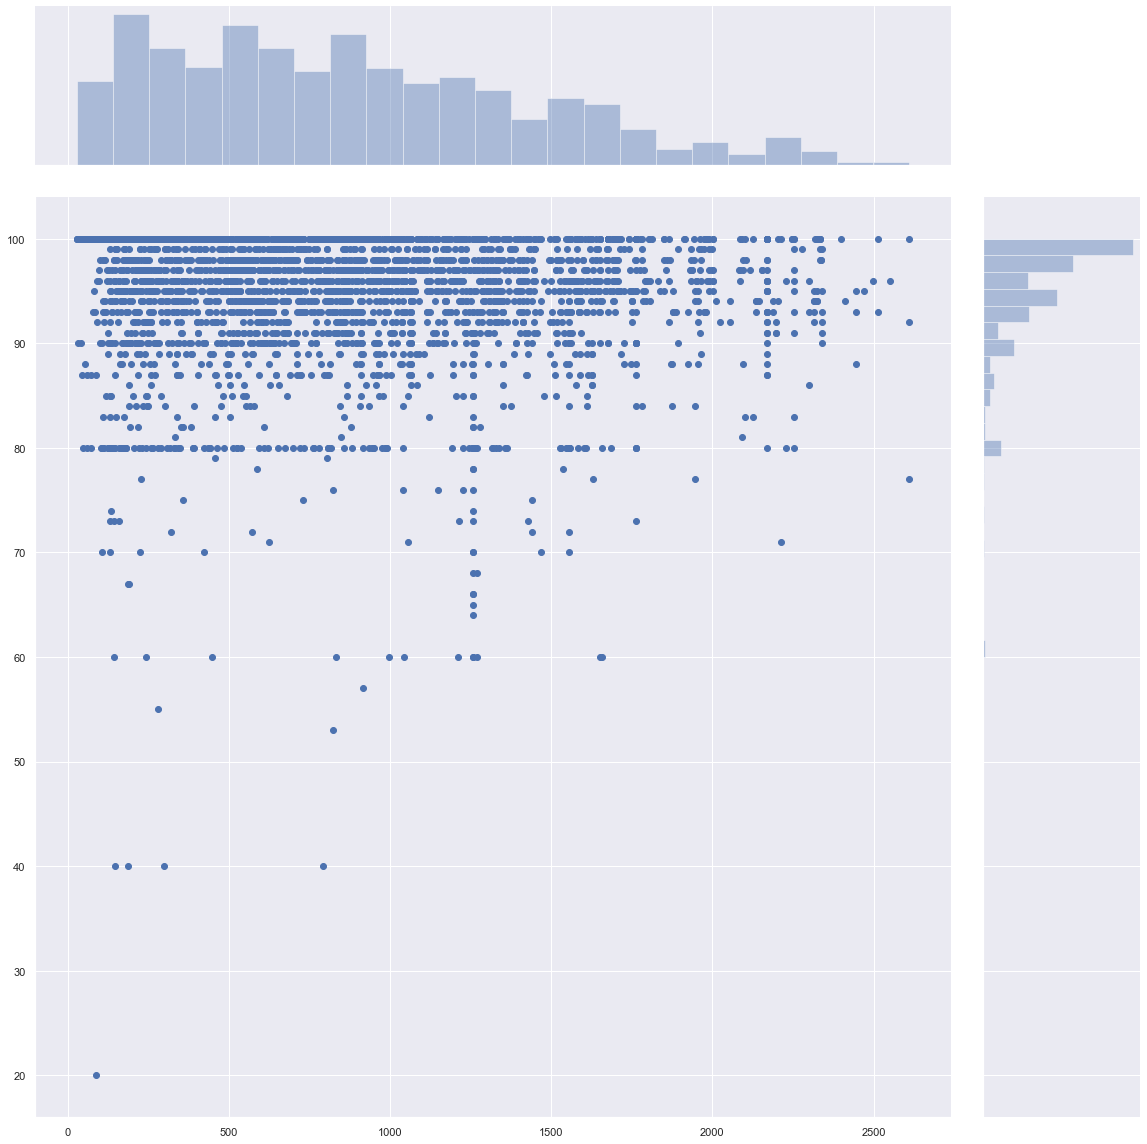

In [12]:
#1)host since(date) to review rating
#calculated from host_since
listingsData['days_on_airbnb'] = (np.datetime64('2016-01-04') - listingsData['host_since']).dt.days
# timedelta_series.dt.days 
listingsData.info()
#calculate in number of days(linear regression?) whether 
#theres a correlation with number of days on airbnb to review rating
reviewRating = pd.DataFrame(listingsData['review_scores_rating'])
reviewRating.dropna()
sb.jointplot(x = daysOnAirbnb, y = reviewRating, height = 16)

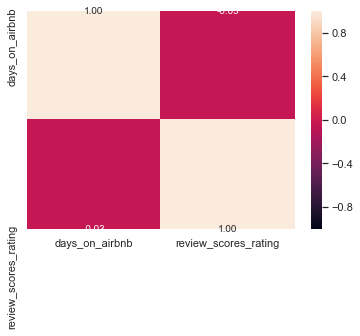

In [13]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([daysOnAirbnb, reviewRating.reindex(index=daysOnAirbnb.index)], sort = False, axis = 1)

# Calculate the correlation between the two columns/variables
jointDF.corr()
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

#commment: looks like theres almost no correlation between the number of days the host has been on airbnb and 
#review rating 0.03

In [14]:
listingsData

,id,summary,space,description,neighbourhood,neighborhood_overview,notes,transit,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,price,review_scores_rating,host_listings_count,days_on_airbnb
0,241032,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,Queen Anne,NaN,NaN,NaN,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,85.0,95.0,3.0,1607.0
1,953595,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,Queen Anne,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,150.0,96.0,6.0,1047.0
2,3308979,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Queen Anne,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,67%,100%,f,975.0,97.0,2.0,571.0
3,7421966,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,Queen Anne,NaN,NaN,NaN,2013-11-06,"Seattle, Washington, United States",NaN,NaN,NaN,NaN,f,100.0,NaN,1.0,789.0
4,278830,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Queen Anne,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,2011-11-29,"Seattle, Washington, United States","Hi, I live in Seattle, Washington but I'm orig...",within an hour,100%,NaN,f,450.0,92.0,2.0,1497.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,Fremont,We're located near lots of family fun. Woodlan...,NaN,NaN,2015-04-13,US,NaN,within a few hours,99%,100%,f,359.0,80.0,354.0,266.0
3814,8902327,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,Portage Bay,The neighborhood is a quiet oasis that is clos...,This is a basement apartment in a newer reside...,Uber and Car2go are good options in Seattle. T...,2015-10-14,"Seattle, Washington, United States",I am a 58 year old male that is married to Mag...,within an hour,100%,100%,f,79.0,100.0,1.0,82.0
3815,10267360,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",NaN,NaN,NaN,NaN,2015-12-30,US,NaN,NaN,NaN,NaN,f,93.0,NaN,1.0,5.0
3816,9604740,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,NaN,Madison Park offers a peaceful slow pace upsca...,NaN,Yes,2015-01-03,"Tacoma, Washington, United States",NaN,within an hour,100%,NaN,f,99.0,NaN,1.0,366.0


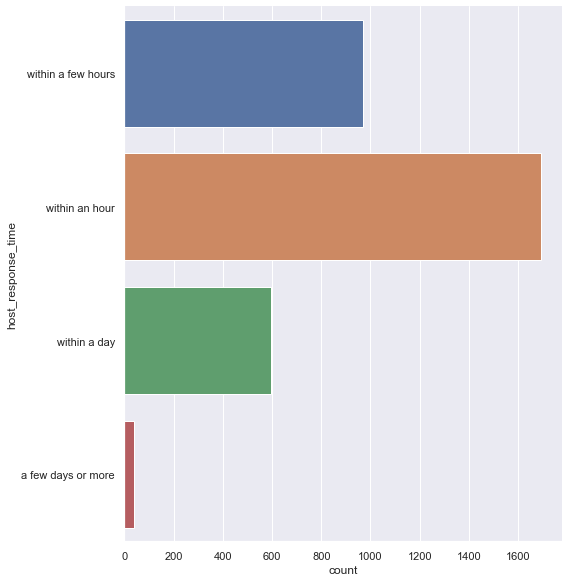

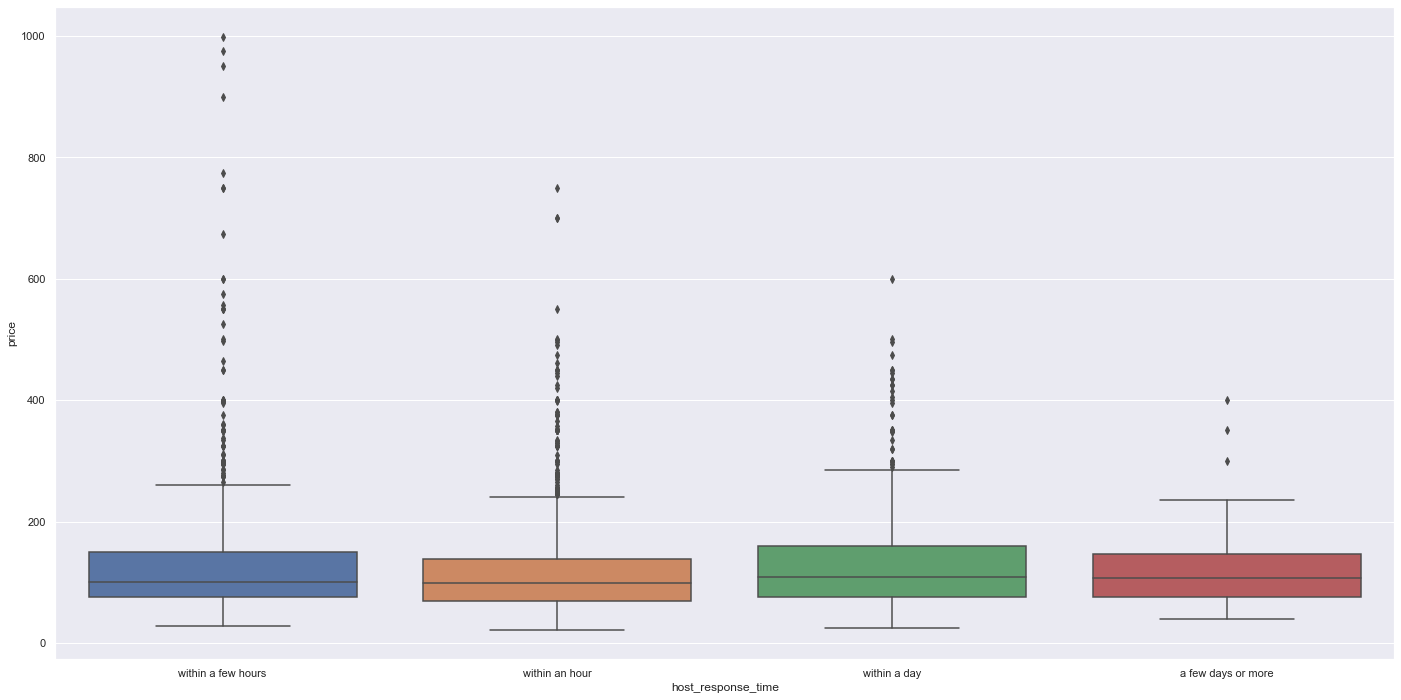

In [15]:
#2)host response time corr to price and review_rating
#a) host response time corr to price 
#four different categories here. 1. within a few hours 2. within an hour 3. within a day 4. a few days or more
hostResponseTime = pd.DataFrame(listingsData["host_response_time"])

sb.catplot(y = 'host_response_time', data = hostResponseTime, kind = "count", height = 8)
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.boxplot(x = 'host_response_time', y = 'price', data = listingsData)
#hosts with fast response times may be able to set listing prices higher compared to others(but only the outliers)

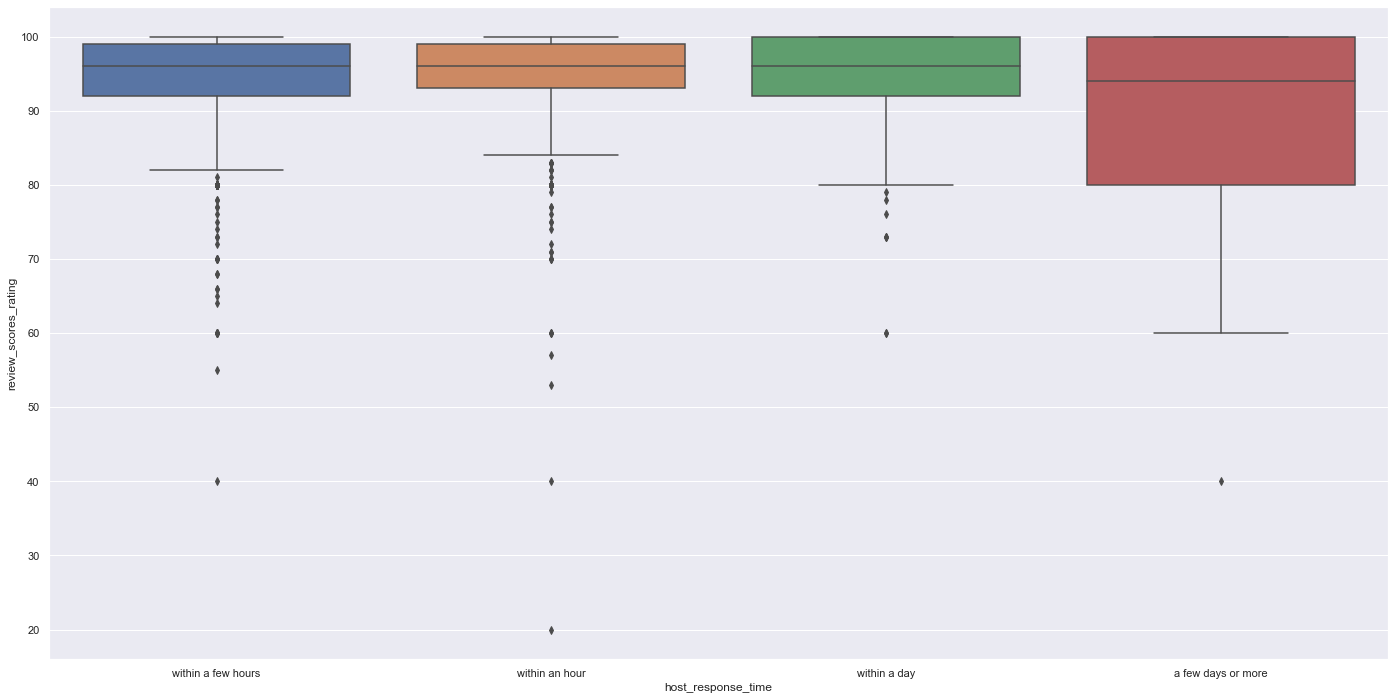

In [16]:
#2)host response time corr to price and review_rating
#b) host response time corr to review_rating
#four different categories here. 1. within a few hours 2. within an hour 3. within a day 4. a few days or more
hostResponseTime = pd.DataFrame(listingsData["host_response_time"])

f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.boxplot(x = 'host_response_time', y = 'review_scores_rating', data = listingsData)
#it's obvious that the spread of ratings for a host with the worst host response time are bigger with slightly
#lower median compared to others

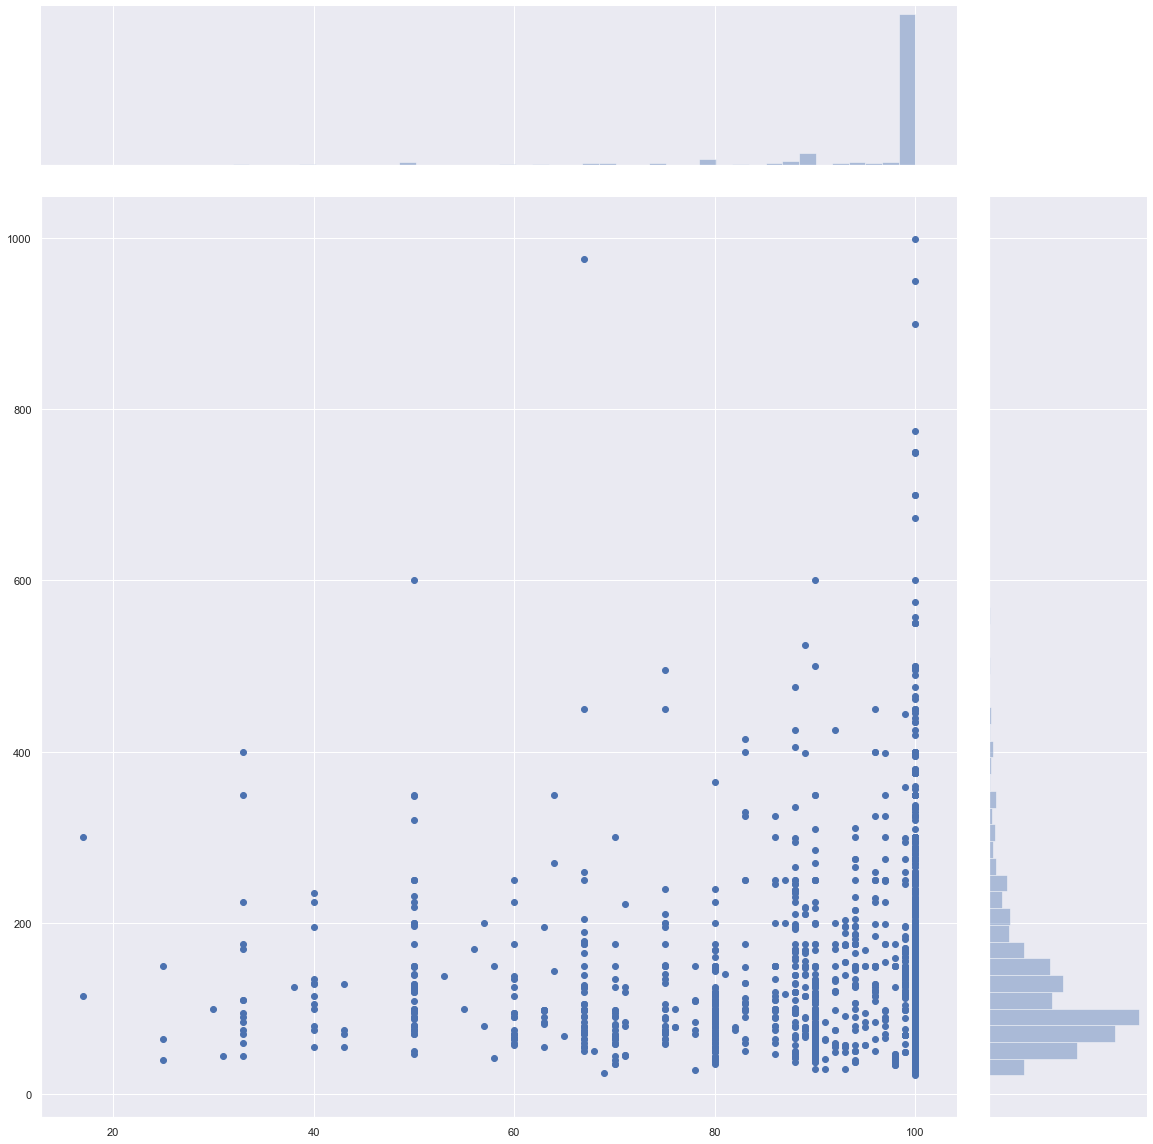

In [17]:
#3)host response rate corr to price and review_rating
#a) host response time corr to price 
#data prep
hostResponseRate = pd.DataFrame(listingsData['host_response_rate'].str.replace("%","").astype("float"))
hostResponseRate
#joint plot of reponse rate to listing price
sb.jointplot(x = hostResponseRate, y = listingPrice, height = 16)

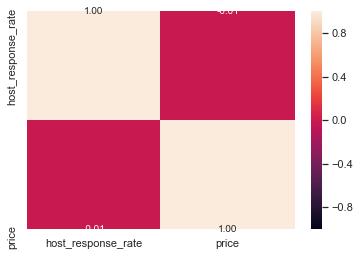

In [18]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([hostResponseRate, listingPrice.reindex(index=hostResponseRate.index)], sort = False, axis = 1)

# Calculate the correlation between the two columns/variables
jointDF.corr()
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

#commment: looks like theres almost no correlation between host reponse rate and 
#listing price 0.01

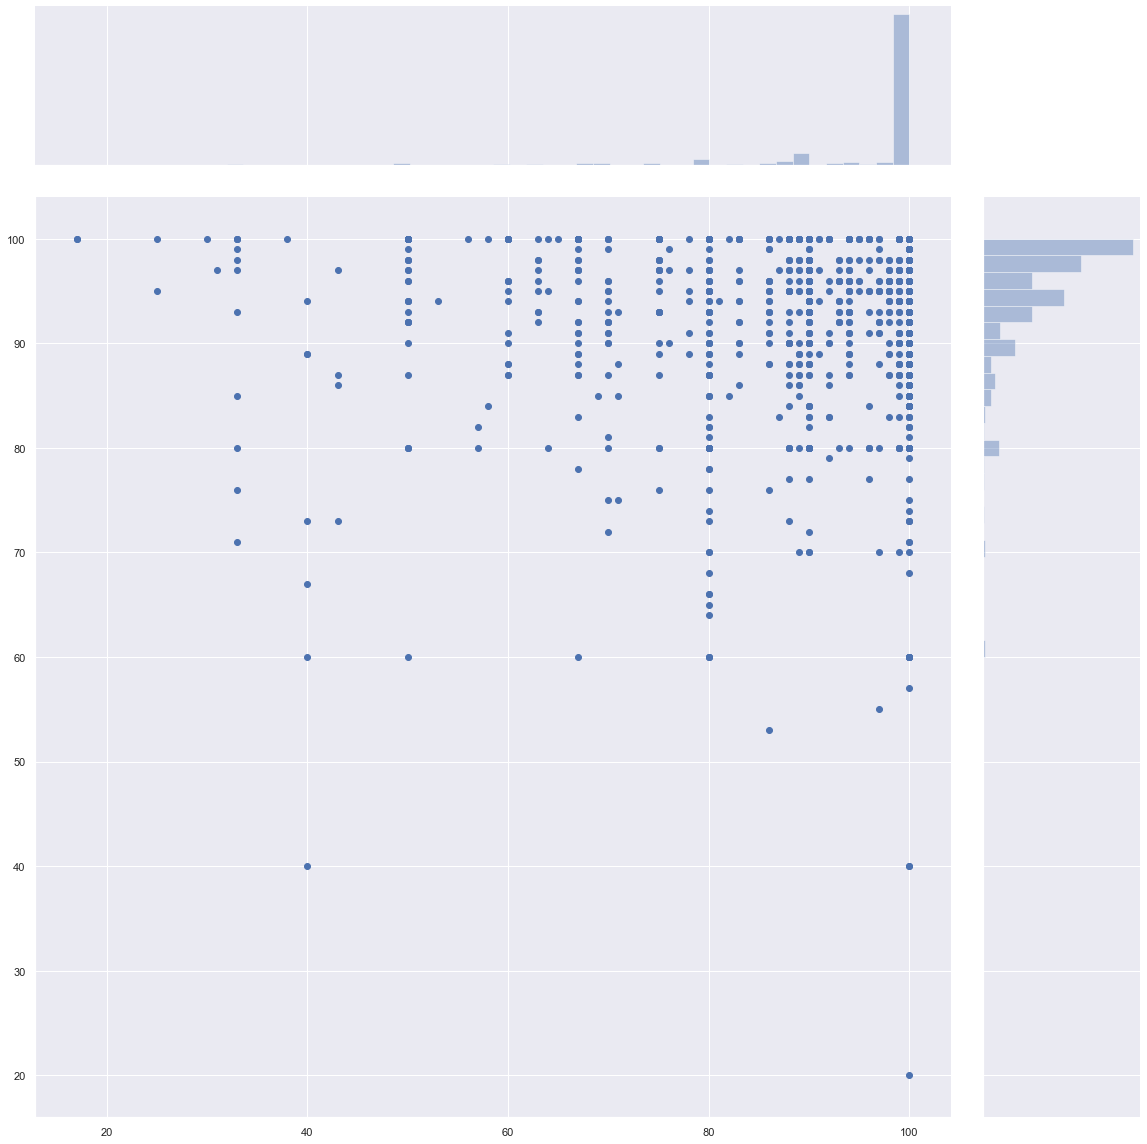

In [19]:
#3)host response rate corr to price and review_rating
#b) host response rate corr to review_rating

#joint plot of reponse rate to reviewRating
sb.jointplot(x = hostResponseRate, y = reviewRating, height = 16)

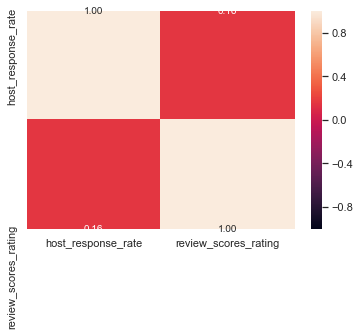

In [20]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([hostResponseRate, reviewRating.reindex(index=hostResponseRate.index)], sort = False, axis = 1)

# Calculate the correlation between the two columns/variables
jointDF.corr()
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

#commment: looks like theres almost no correlation between host reponse rate and 
#review rating 0.16 corr

review_scores_cat
poor             105.0
average          129.0
above average    100.0
good             103.0
very good         99.0
excellent        100.0
Name: price, dtype: float64

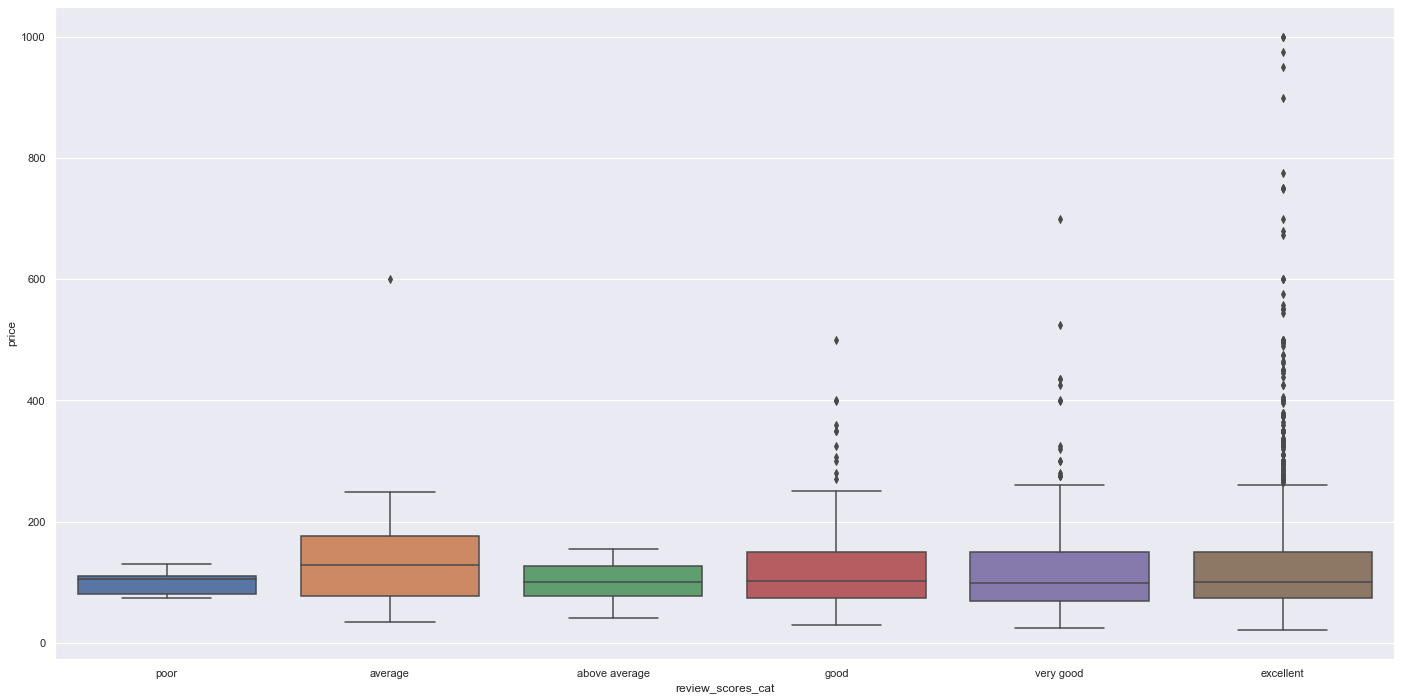

In [21]:
#host response rate to price
# df = pd.DataFrame({'x': [2, 1], 'y': [-7, -5], 'z': [-30, -20]})
copyOfData = listingsData.copy()
bins = [0, 50, 60, 70, 80, 90, 100]
labels = ["poor", "average", "above average", "good","very good", "excellent"]
copyOfData['review_scores_cat'] = pd.cut(copyOfData['review_scores_rating'], bins=bins, labels=labels)
plotData = copyOfData[["review_scores_cat","price"]]
plotData = plotData.dropna()

f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.boxplot(x = 'review_scores_cat', y = 'price', data = plotData)
#Altho not a linear relation, better review scores contain significant price increase for certain listings
plotData.groupby('review_scores_cat')['price'].median()

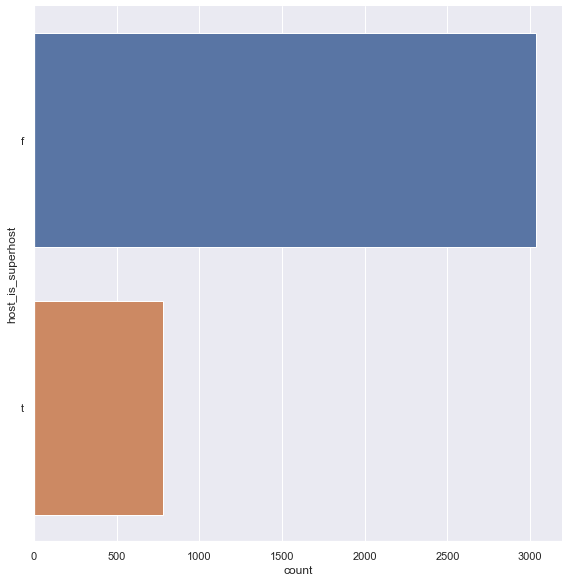

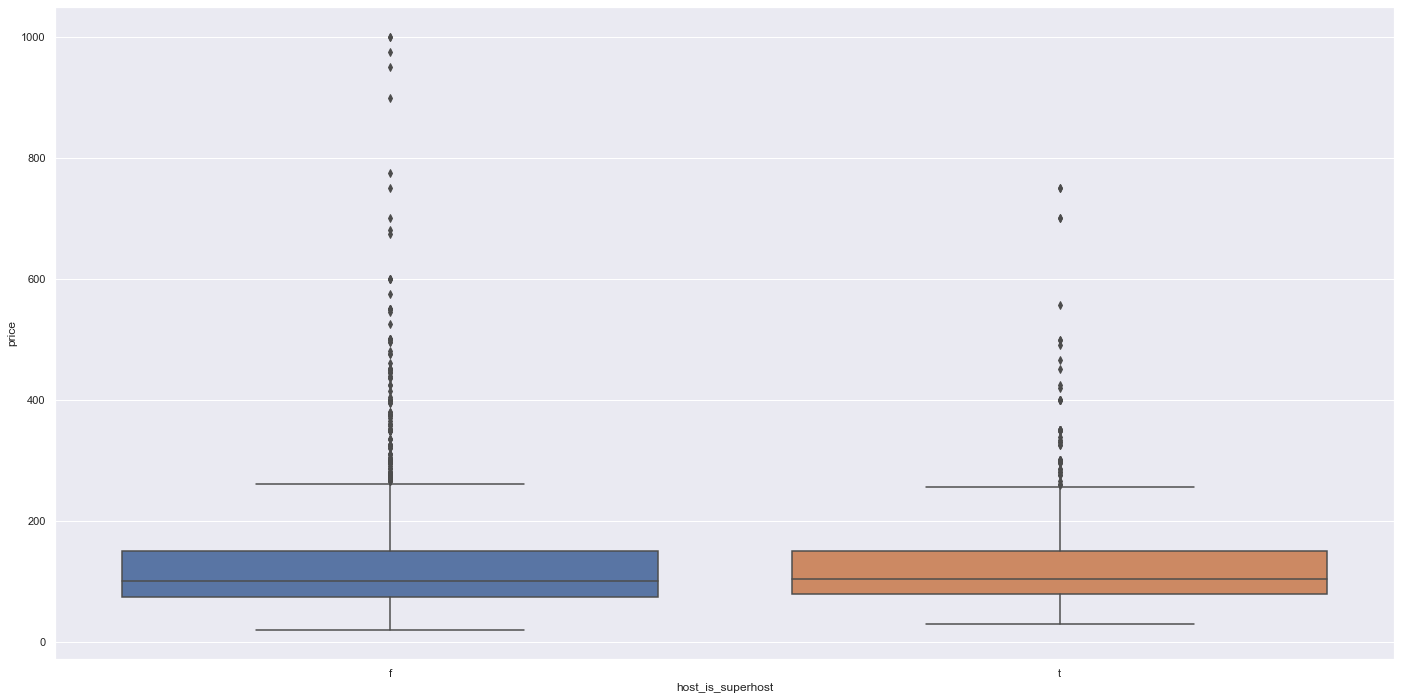

In [22]:
#4)is superhost to price and review rating
#a) to price
copyOfData = listingsData.copy()
sb.catplot(y = 'host_is_superhost', data = copyOfData, kind = "count", height = 8)
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.boxplot(x = 'host_is_superhost', y = 'price', data = copyOfData)

#it seems that the median price are almost identical for both super hosts and non super hosts, although it looks like
#the price of a few listings by non superhosts have been set to be higher compared to the superhosts. Odd observation,
#we would think that superhosts would be able to set higher prices for their listings

host_is_superhost
f    95.0
t    98.0
Name: review_scores_rating, dtype: float64

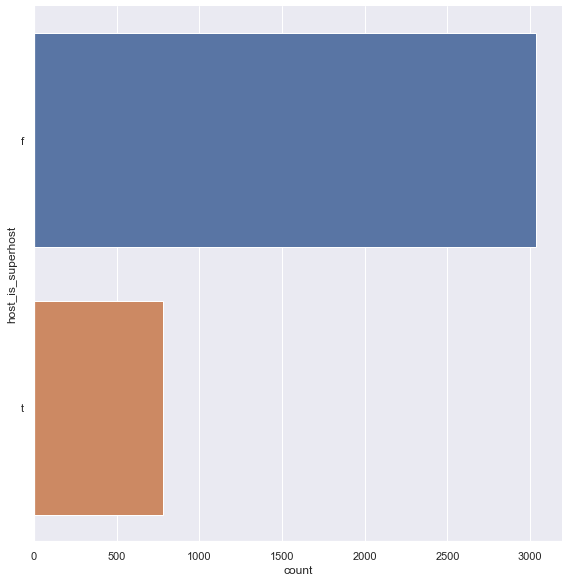

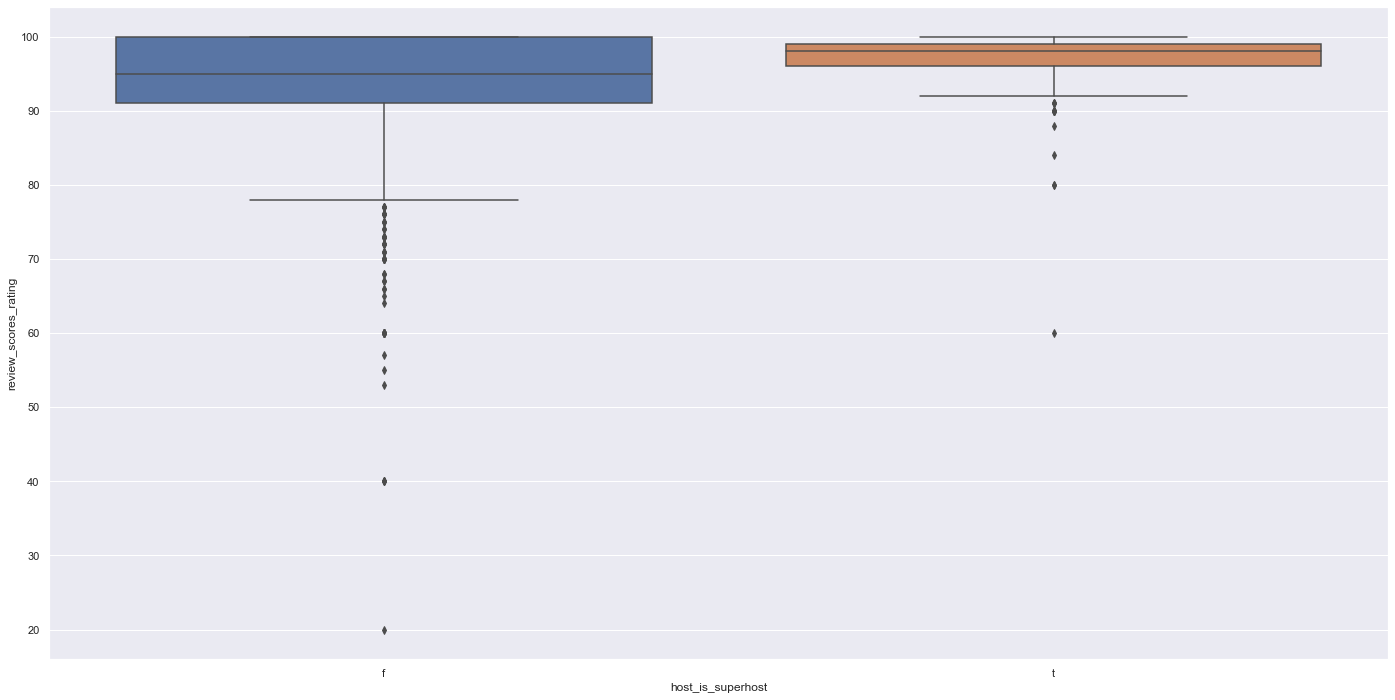

In [23]:
#4)is superhost to price and review rating
#b) to review rating
copyOfData = listingsData.copy()
sb.catplot(y = 'host_is_superhost', data = copyOfData, kind = "count", height = 8)
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.boxplot(x = 'host_is_superhost', y = 'review_scores_rating', data = copyOfData)

#The median 

copyOfData.groupby("host_is_superhost")["review_scores_rating"].median()
#the median review rating of superhosts are higher and the spread of ratings for superhosts are smaller
#and on the higher side(around 90 to 100), whereas for non superhosts the spread of ratings are larger.

In [24]:
#5)neighborhood to price and review rating
copyOfData.groupby("neighbourhood")["price"].median()
#too many different neighbourhoods to plot?

neighbourhood
Alki              219.0
Arbor Heights     100.0
Atlantic          107.5
Ballard            96.0
Belltown          140.0
                  ...  
Wallingford       100.0
Wedgewood          75.0
Westlake          115.0
Windermere        127.5
Yesler Terrace    145.0
Name: price, Length: 81, dtype: float64

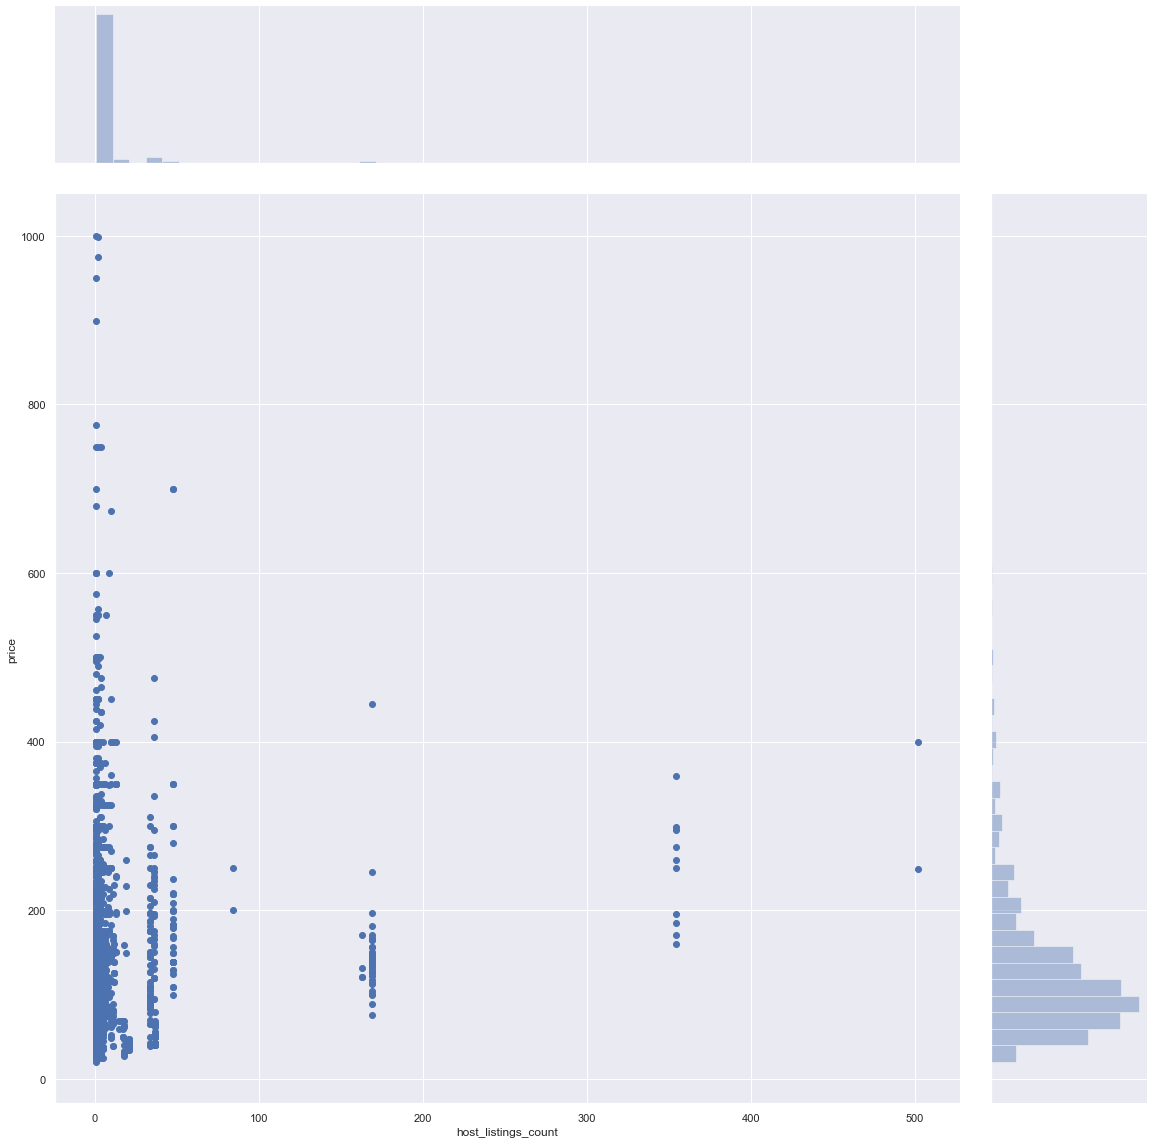

In [25]:
#6)listings count to price and review rating
#a)price
copyOfData = listingsData.copy()
# copyOfData.groupby("host_listings_count")["price"].median()
listingsCount = copyOfData["host_listings_count"]
listingPrice = copyOfData["price"]
sb.jointplot(x = listingsCount, y = listingPrice, height = 16)


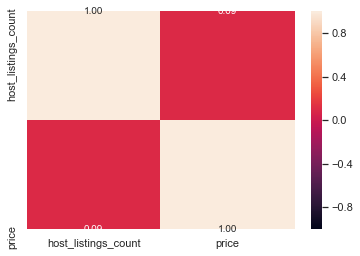

In [26]:
#Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([listingsCount, listingPrice.reindex(index=listingsCount.index)], sort = False, axis = 1)

# Calculate the correlation between the two columns/variables
jointDF.corr()
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

#commment: looks like theres almost no correlation between host reponse rate and 
#listing price 0.09

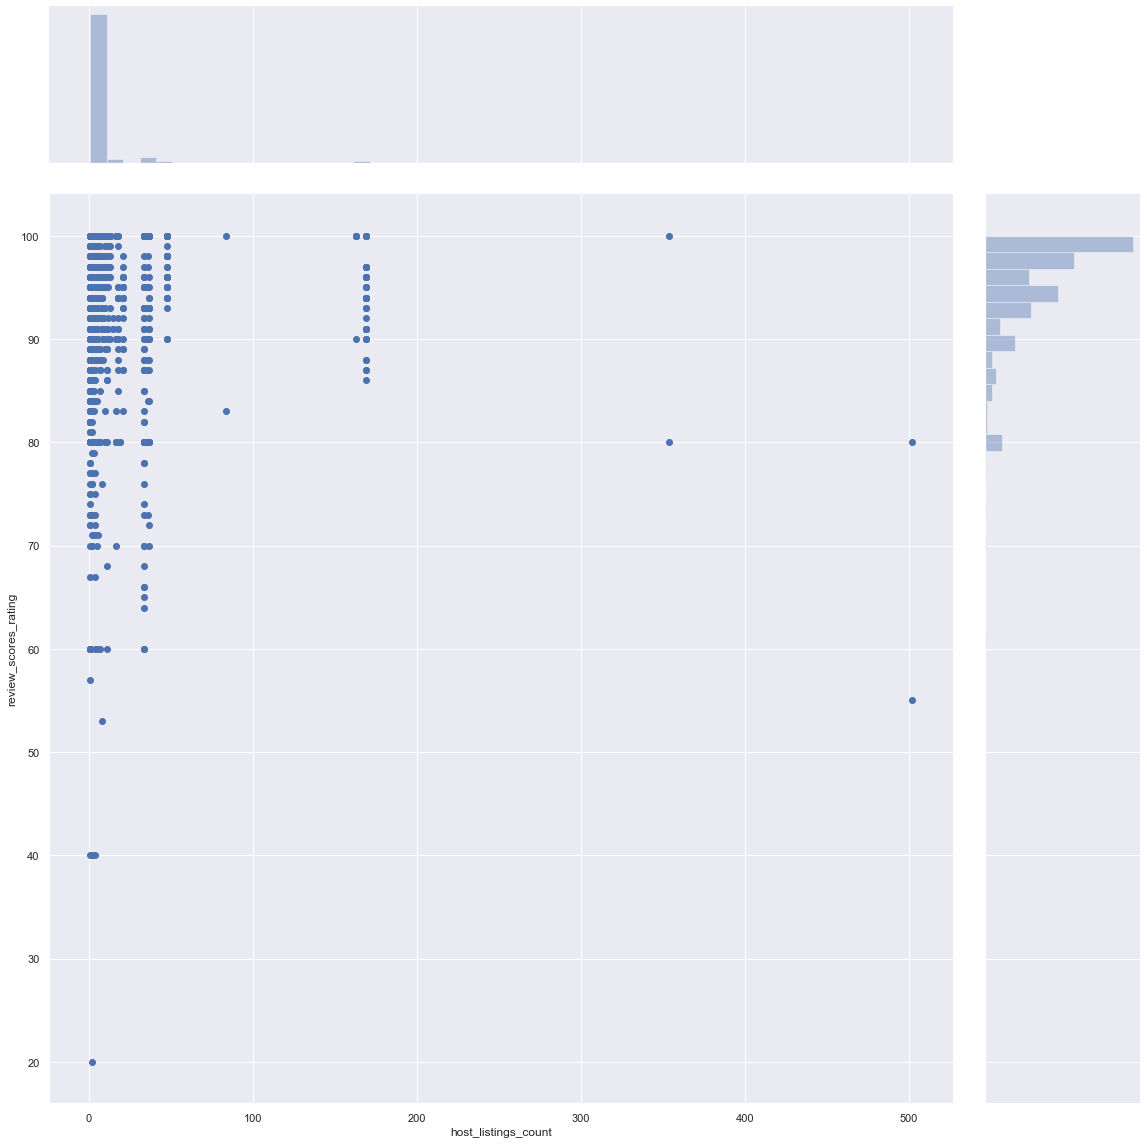

In [27]:
#6)listings count to price and review rating
#b)review rating
copyOfData = listingsData.copy()
# copyOfData.groupby("host_listings_count")["price"].median()
listingsCount = copyOfData["host_listings_count"]
reviewRating = copyOfData["review_scores_rating"]
sb.jointplot(x = listingsCount, y = reviewRating, height = 16)

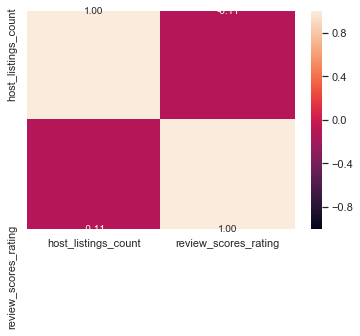

In [28]:
#Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([listingsCount, reviewRating.reindex(index=listingsCount.index)], sort = False, axis = 1)

# Calculate the correlation between the two columns/variables
jointDF.corr()
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

#commment: looks like theres almost no correlation between host reponse rate and 
#listing price 0.11 -> pretty good corr compared to others.

In [32]:
copyOfData

,id,summary,space,description,neighbourhood,neighborhood_overview,notes,transit,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,price,review_scores_rating,host_listings_count,days_on_airbnb
0,241032,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,Queen Anne,NaN,NaN,NaN,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,85.0,95.0,3.0,1607.0
1,953595,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,Queen Anne,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,150.0,96.0,6.0,1047.0
2,3308979,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Queen Anne,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,67%,100%,f,975.0,97.0,2.0,571.0
3,7421966,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,Queen Anne,NaN,NaN,NaN,2013-11-06,"Seattle, Washington, United States",NaN,NaN,NaN,NaN,f,100.0,NaN,1.0,789.0
4,278830,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Queen Anne,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,2011-11-29,"Seattle, Washington, United States","Hi, I live in Seattle, Washington but I'm orig...",within an hour,100%,NaN,f,450.0,92.0,2.0,1497.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,Fremont,We're located near lots of family fun. Woodlan...,NaN,NaN,2015-04-13,US,NaN,within a few hours,99%,100%,f,359.0,80.0,354.0,266.0
3814,8902327,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,Portage Bay,The neighborhood is a quiet oasis that is clos...,This is a basement apartment in a newer reside...,Uber and Car2go are good options in Seattle. T...,2015-10-14,"Seattle, Washington, United States",I am a 58 year old male that is married to Mag...,within an hour,100%,100%,f,79.0,100.0,1.0,82.0
3815,10267360,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",NaN,NaN,NaN,NaN,2015-12-30,US,NaN,NaN,NaN,NaN,f,93.0,NaN,1.0,5.0
3816,9604740,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,NaN,Madison Park offers a peaceful slow pace upsca...,NaN,Yes,2015-01-03,"Tacoma, Washington, United States",NaN,within an hour,100%,NaN,f,99.0,NaN,1.0,366.0
